Task 1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# Load the image
image_path = "/content/Lena_Image.png"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# Function to plot histogram
def plot_histogram(image, title, is_color=False):
    plt.figure(figsize=(10, 5))
    if is_color:
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color, label=f'Channel {color}')
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black', label='Grayscale')

    plt.xlabel("Gray Level / Intensity")
    plt.ylabel("Pixel Count")
    plt.title(title)
    plt.legend()
    plt.show()

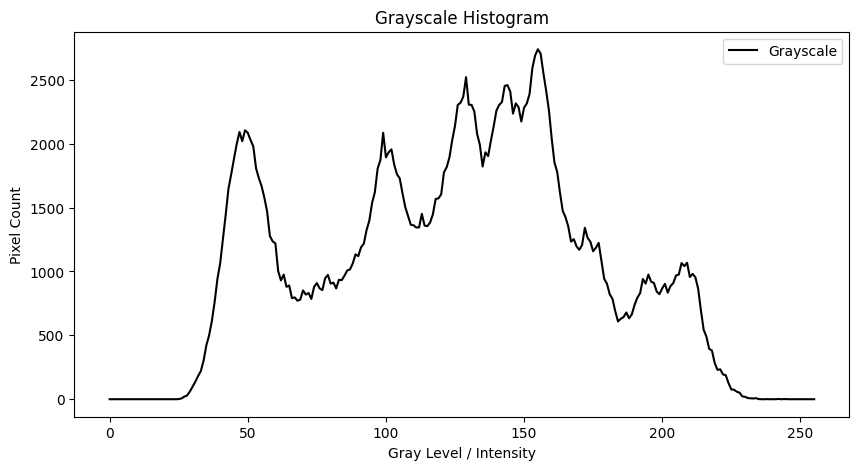

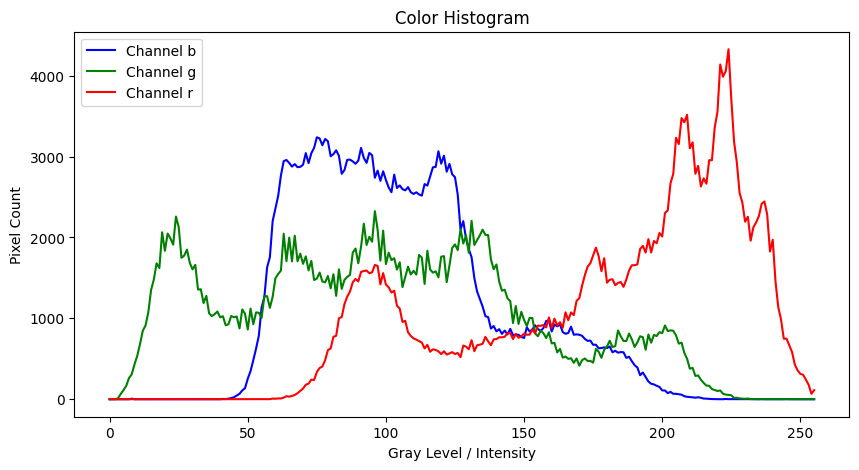

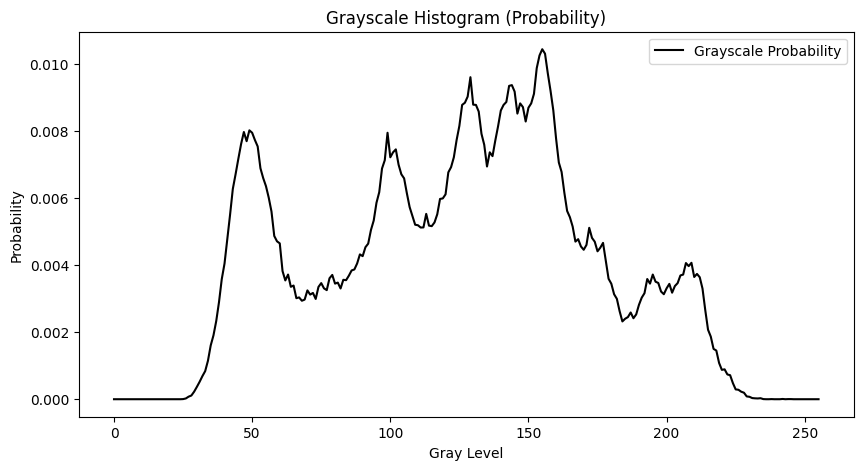

In [5]:
# Compute and plot histograms
plot_histogram(gray, "Grayscale Histogram")
plot_histogram(image, "Color Histogram", is_color=True)

# Normalize histogram to probability
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_gray_prob = hist_gray / hist_gray.sum()

plt.figure(figsize=(10, 5))
plt.plot(hist_gray_prob, color='black', label="Grayscale Probability")
plt.xlabel("Gray Level")
plt.ylabel("Probability")
plt.title("Grayscale Histogram (Probability)")
plt.legend()
plt.show()

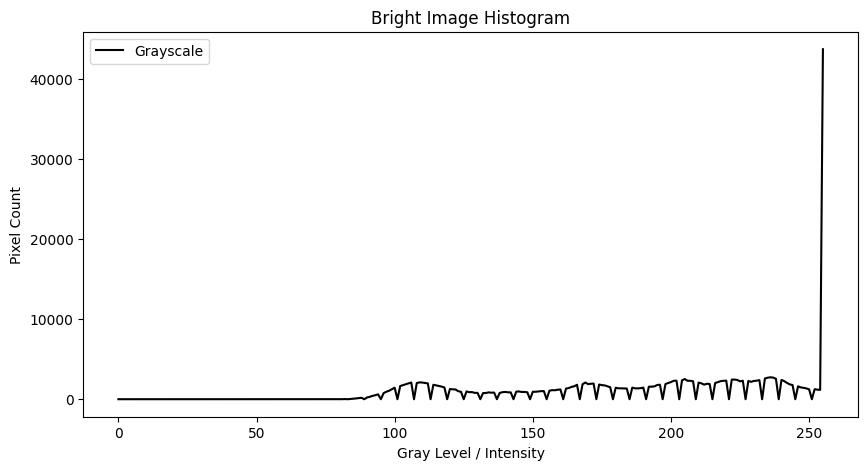

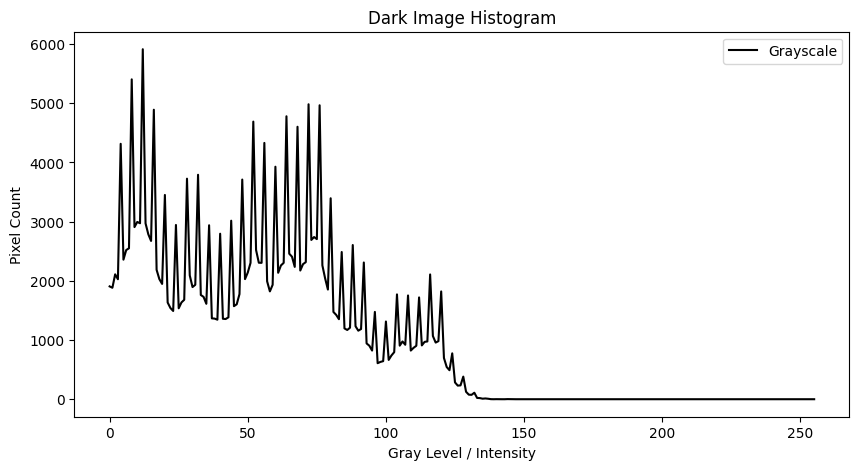

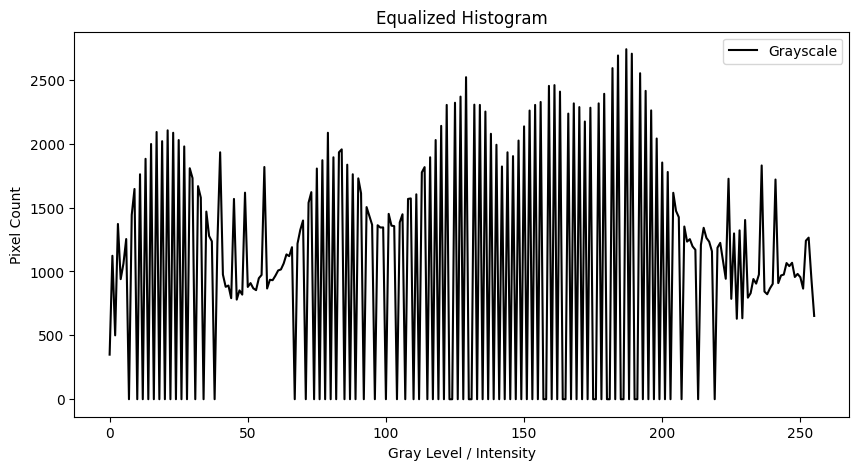

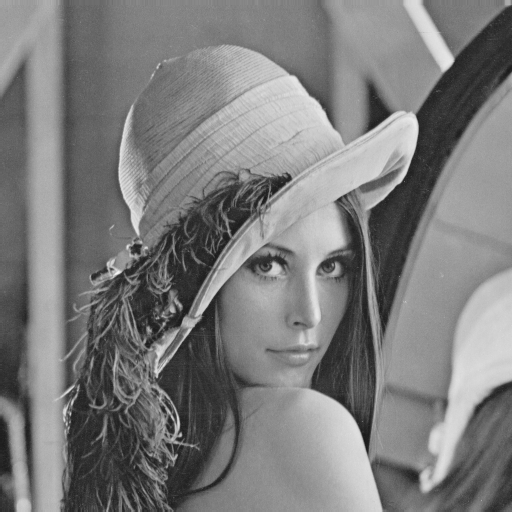

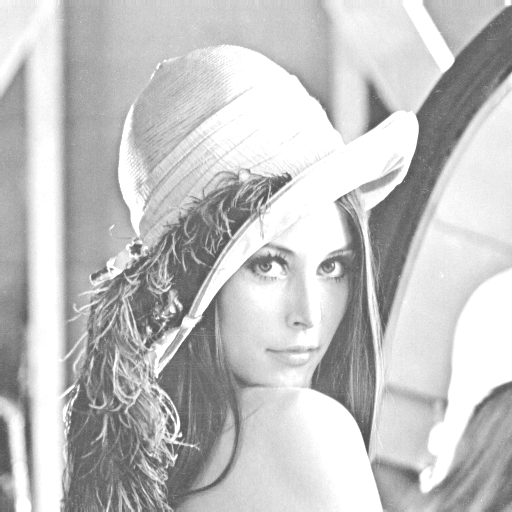

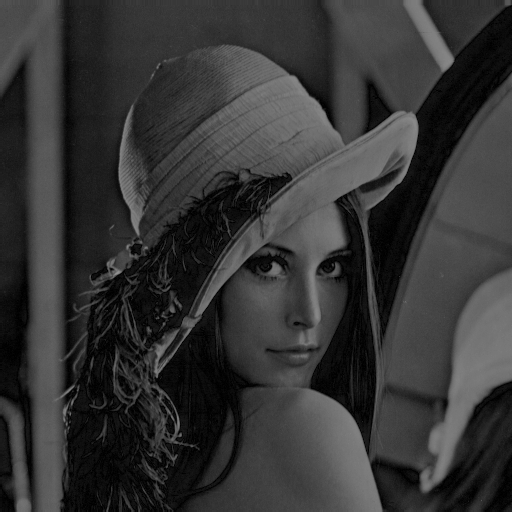

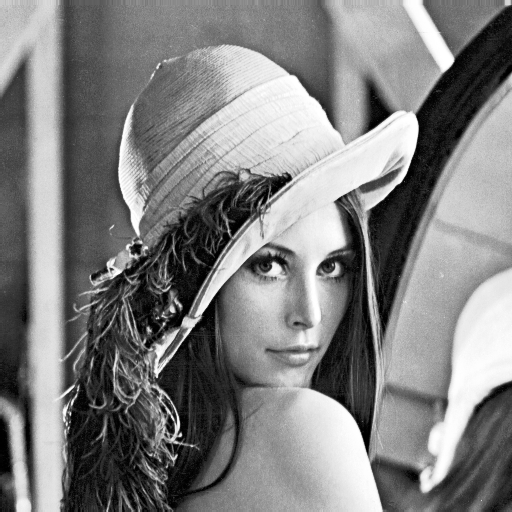

In [6]:
# Bright and dark image histograms
bright_image = cv2.convertScaleAbs(gray, alpha=1.2, beta=50)
dark_image = cv2.convertScaleAbs(gray, alpha=0.8, beta=-50)

plot_histogram(bright_image, "Bright Image Histogram")
plot_histogram(dark_image, "Dark Image Histogram")

# Contrast Enhancement using Histogram Equalization
equalized = cv2.equalizeHist(gray)

# Display enhanced histogram
plot_histogram(equalized, "Equalized Histogram")

# Display results
cv2_imshow(gray)
cv2_imshow(bright_image)
cv2_imshow(dark_image)
cv2_imshow(equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Task 2

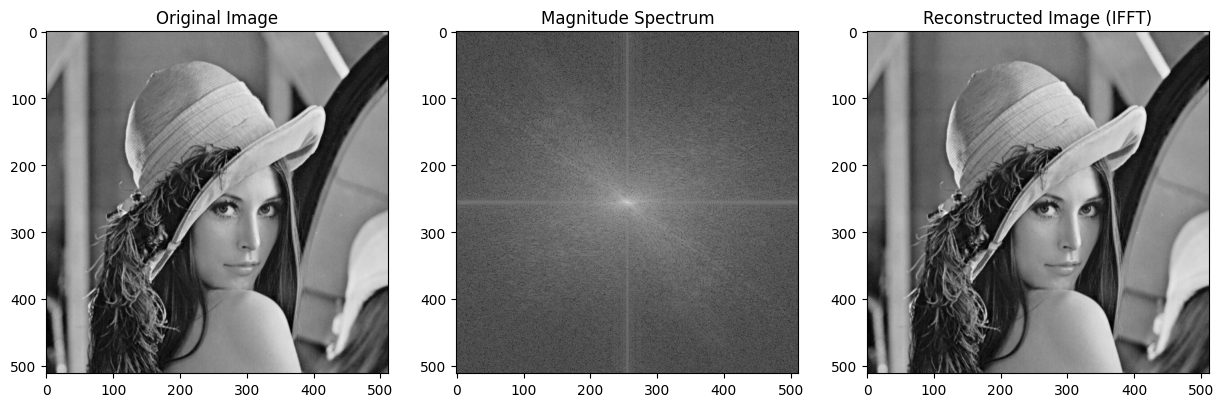

In [9]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to compute FFT and return magnitude spectrum
def compute_fft(image):
    dft = np.fft.fft2(image)  # Compute the FFT
    dft_shifted = np.fft.fftshift(dft)  # Shift zero frequency to center
    magnitude_spectrum = 20 * np.log1p(np.abs(dft_shifted))  # Compute magnitude spectrum
    return dft, dft_shifted, magnitude_spectrum

# Compute FFT of the original image
dft, dft_shifted, magnitude_spectrum = compute_fft(image)

# Compute Inverse FFT (Reconstruction)
reconstructed = np.fft.ifft2(dft).real  # Take real part only

# Display original image, magnitude spectrum, and reconstructed image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed, cmap="gray")
plt.title("Reconstructed Image (IFFT)")

plt.show()

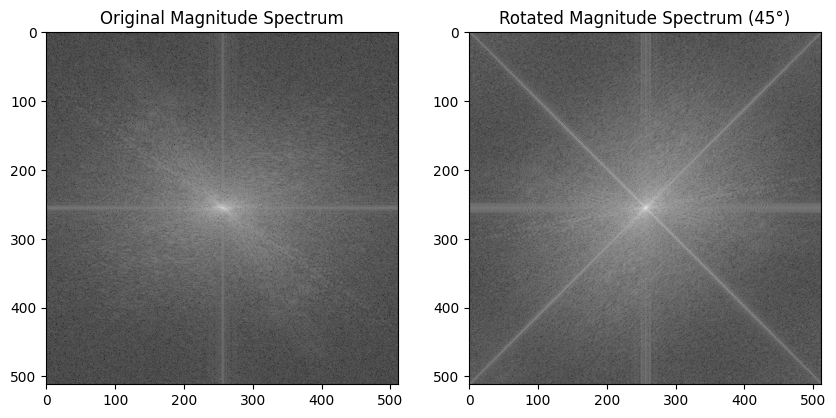

In [10]:
# Rotation Property of FFT
angle = 45  # Rotate image by 45 degrees
(h, w) = image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Compute FFT of rotated image
_, _, rotated_magnitude_spectrum = compute_fft(rotated_image)

# Display original and rotated magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Original Magnitude Spectrum")

plt.subplot(1, 2, 2)
plt.imshow(rotated_magnitude_spectrum, cmap="gray")
plt.title("Rotated Magnitude Spectrum (45°)")

plt.show()